# Name: Carlos Gross-Martinez
# Z Number: 23226341
#https://colab.research.google.com/drive/1EoCY8UM-CeII6vpjeiBzBT4-zMj3Aoct?usp=sharing
#Problem: 2 - Application of Keras to build, compile, and train a neural network to perform XOR operations

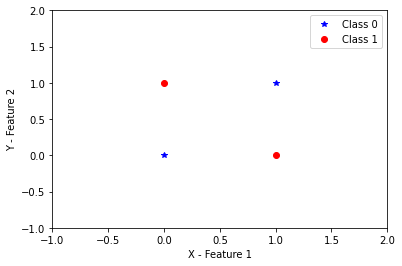

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

c0 = np.array([[0,0],[1,1]])
c1 = np.array([[0,1],[1,0]])

features = np.array([[0,0],[0,1],[1,0],[1,1]])
features_labels = np.array([[0],[1],[1],[0]])
classes = [0,1]

plt.figure
plt.plot(c0[:,0], c0[:,1], 'b*', c1[:,0], c1[:,1],'ro')
plt.axis([-1,2,-1,2])
plt.xlabel('X - Feature 1')
plt.ylabel('Y - Feature 2')
plt.legend(['Class 0','Class 1'])
plt.show()

#Answer to 2c
Based on the plot, I believe that once hidden layer with two nodes will suffice the model to properly classify the training data points correctly. This assumption is based in that each neuron or node in the hidden layer is able procure a threshold which will classify different aspects of the model. Based on the picture, one threshold of one neuron can be used to learn to recognize the difference be between the 2 class 0 data points and the class 1 data point located in the top left of the quadrant. The second threshold on the other neuron can be used to learn the difference be between the 2 class 0 data points and the class 1 data point located in the bottom right of the quadrant. Finally, the output layer will only require one neuron or node to process the outputs from the two nodes located in the hidden layer

In [ ]:
#defining model
model_a = Sequential()
model_a.add(Dense(input_dim=2, units=2, activation='sigmoid'))
model_a.add(Dense(input_dim=2, units=1, activation='sigmoid'))
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#Answer to 2e
Based on the fact that we trying to train a model to make a binary classification, the best loss function to be implemented is the binary classification loss function cross entropy

In [ ]:
#compiling the model
model_a.compile(loss='binary_crossentropy',
                optimizer=SGD(lr=0.1),
                metrics=['accuracy'])

In [ ]:
#training the model
history = model_a.fit(features, features_labels,
                      batch_size=1,
                      epochs=200,
                      verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 3ms/step - loss: 0.7799 - accuracy: 0.4333
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5667
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7333
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.7333
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.4333
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.3667
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7402 - accuracy: 0.4333
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7460 - accuracy: 0.3667
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.7333
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.6333
Epoch 11/200
4/4 [===========

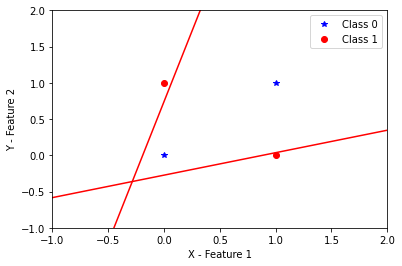

In [ ]:
#retrieving model weights
weights = model_a.layers[0].get_weights()

node0_weights = np.array(weights[0][:,0])
node0_weights = np.append(node0_weights, weights[1][0])
node1_weights = np.array(weights[0][:,1])
node1_weights = np.append(node1_weights, weights[1][1])

#plotting of threshold lines
plt.figure
plt.plot(c0[:,0], c0[:,1], 'b*', c1[:,0], c1[:,1],'ro')
plt.axis([-1,2,-1,2])
node0_x1 = np.linspace(-1, 2, 50)
node0_x2 = -(node0_weights[0] * node0_x1 + node0_weights[2]) / node0_weights[1]
plt.plot(node0_x1, node0_x2, '-r')
node1_x1 = np.linspace(-1, 2, 50)
node1_x2 = -(node1_weights[0] * node1_x1 + node1_weights[2]) / node1_weights[1]
plt.plot(node1_x1, node1_x2, '-r')
plt.xlabel('X - Feature 1')
plt.ylabel('Y - Feature 2')
plt.legend(['Class 0','Class 1'])
plt.show()

Text(0.5, 1.0, 'Loss Function Graph')

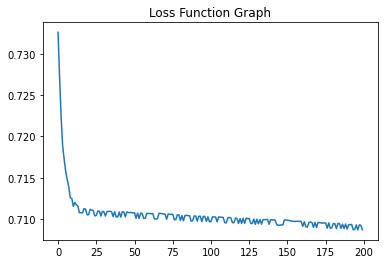

In [ ]:
#plotting loss function
plt.figure()
#plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Loss Function Graph')

#Answer to 2i


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


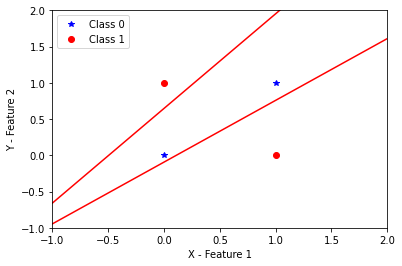

Text(0.5, 1.0, 'Loss Function Graph')

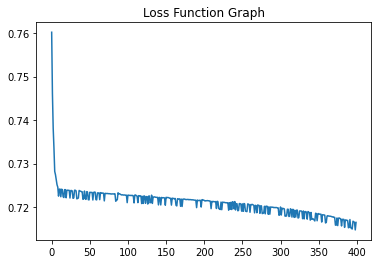

In [ ]:
#defining model
model_b = Sequential()
model_b.add(Dense(input_dim=2, units=4, activation='sigmoid'))
model_b.add(Dense(input_dim=2, units=1, activation='sigmoid'))
model_b.summary()

#compiling the model
model_b.compile(loss='binary_crossentropy',
                optimizer=SGD(lr=0.1),
                metrics=['accuracy'])

#training the model
history = model_b.fit(features, features_labels,
                      batch_size=1,
                      epochs=400,
                      verbose=0)

#retrieving model weights
weights = model_b.layers[0].get_weights()
node0_weights = np.array(weights[0][:,0])
node0_weights = np.append(node0_weights, weights[1][0])
node1_weights = np.array(weights[0][:,1])
node1_weights = np.append(node1_weights, weights[1][1])

#plotting of threshold lines
plt.figure
plt.plot(c0[:,0], c0[:,1], 'b*', c1[:,0], c1[:,1],'ro')
plt.axis([-1,2,-1,2])
node0_x1 = np.linspace(-1, 2, 50)
node0_x2 = -(node0_weights[0] * node0_x1 + node0_weights[2]) / node0_weights[1]
plt.plot(node0_x1, node0_x2, '-r')
node1_x1 = np.linspace(-1, 2, 50)
node1_x2 = -(node1_weights[0] * node1_x1 + node1_weights[2]) / node1_weights[1]
plt.plot(node1_x1, node1_x2, '-r')
plt.xlabel('X - Feature 1')
plt.ylabel('Y - Feature 2')
plt.legend(['Class 0','Class 1'])
plt.show()

#plotting loss function
plt.plot(history.history['loss'])
plt.title('Loss Function Graph')

#Answer to 2j
From adding more nodes to the classifier model, it can be noted that model with more neurons had an almost identical quality of classification of the sample data when compared to the model with less neurons. This can be easily noted by looking at the plots of the of both models for the threshold and the loss function graph. From the threshold graphs, it can be noted that both models were able to properly draw the threshold lines so that the two classes are properly separated. Moreover, the loss function graph from both models is very similar as well. Based on this information, it can be noted that the model with less neurons was able to reach the same level of performance as the model the with highest number of neurons. Based on this information, it can be concluded that the model with the smallest number of neurons is the best models as it requires less neurons to deliver the similar performance to the model with more neurons

#Problem: 3 - Application of Keras to build, compile, and train a neural network as a three-class classifier for MNIST dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical

def feat_extract(images):
  features = np.zeros((images.shape[0], 4))


  features_temp = np.sum(images[:, 0:int(images.shape[1]/2),
                                0:int(images.shape[2]/2)], axis=2) #top-left quadrant
  features[:,0] = np.sum(features_temp,axis=1)/(14*14)


  features_temp = np.sum(images[:, 0:int(images.shape[1]/2),
                                int(images.shape[2]/2):], axis=2) #top-right quadrant
  features[:,1] = np.sum(features_temp,axis=1)/(14*14)


  features_temp = np.sum(images[:, int(images.shape[1]/2):,
                                0:int(images.shape[2]/2)], axis=2) #bottom-left quadrant
  features[:,2] = np.sum(features_temp,axis=1)/(14*14)


  features_temp = np.sum(images[:, int(images.shape[1]/2):,
                                int(images.shape[2]/2):], axis=2) #bottom-right quadrant
  features[:,3] = np.sum(features_temp,axis=1)/(14*14)

  return features


#spliting MNIST dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train[np.logical_or.reduce((y_train == 0, y_train == 1, y_train == 2)), :, :]
y_train = y_train[np.logical_or.reduce((y_train == 0, y_train == 1, y_train == 2))]


x_test = x_test[np.logical_or.reduce((y_test == 0, y_test == 1, y_test == 2)), :, :]
y_test = y_test[np.logical_or.reduce((y_test == 0, y_test == 1, y_test == 2))]


classes = [0, 1, 2]


#shuffling the training set
num_train_img = x_train.shape[0]
train_ind = np.arange(0, num_train_img)
train_ind_s = np.random.permutation(train_ind)


#readjusting training set with new shuffle parameters
x_train = x_train[train_ind_s,:,:]
y_train = y_train[train_ind_s]


#select 20% of the trainig set for validation
x_valid = x_train[0 : int(0.2 * num_train_img),:,:]
y_valid = y_train[0 : int(0.2 * num_train_img)]


#select 80% of the trainig set for training
x_train = x_train[int(0.2 * num_train_img):,:,:]
y_train = y_train[int(0.2 * num_train_img):]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#extract features from data sets
feature_train = feat_extract(x_train)
feature_val = feat_extract(x_valid)
feature_test = feat_extract(x_test)

print(feature_train.shape)
print(feature_train)

#convert class vectors to binary class matrices
y_train_categorical = to_categorical(y_train, len(classes))
y_val_categorical = to_categorical(y_valid, len(classes))
y_test_categorical = to_categorical(y_test, len(classes))

print(y_train_categorical.shape)
print(y_train_categorical)

(14899, 4)
[[24.80612245 18.11734694 20.59693878 46.86734694]
 [16.50510204 13.31632653 12.81122449 23.01530612]
 [36.10714286 57.90306122 59.70408163 35.46428571]
 ...
 [22.32653061 13.61734694 18.14795918 22.29081633]
 [ 0.98979592 37.45918367 31.24489796  8.87755102]
 [28.01530612 45.38265306 67.99489796 50.38265306]]
(14899, 3)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
model_c = Sequential()
model_c.add(Dense(input_dim=4, units=100, activation='tanh'))
model_c.add(Dense(input_dim=100, units=50, activation='tanh'))
model_c.add(Dense(units=len(classes), activation='softmax'))
model_c.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the model
model_c.compile(loss='categorical_crossentropy',
                optimizer=SGD(lr=0.0001),
                metrics=['accuracy'])

#training the model
history = model_c.fit(feature_train, y_train_categorical,
                      batch_size=16,
                      epochs=50,
                      verbose=0)

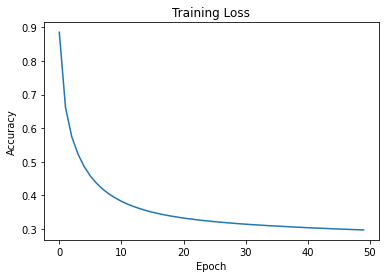

In [ ]:
#plotting training loss
plt.figure
plt.title('Training Loss')
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#obtaining loss and accuracy of train dataset
scores = model_c.evaluate(feature_train, y_train_categorical)
print('Model loss = {}'.format(scores[0]))
print('Model Accuracy = {}'.format(scores[1]))

466/466 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.8925
Model loss = 0.29702070355415344
Model Accuracy = 0.8925431370735168


In [ ]:
#obtaining loss and accuracy of validation data set
scores = model_c.evaluate(feature_val, y_val_categorical)
print('Model loss = {}'.format(scores[0]))
print('Model Accuracy = {}'.format(scores[1]))

117/117 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8934
Model loss = 0.2929466962814331
Model Accuracy = 0.8933941721916199


#Answer to 3f
The main behavior which can be observed based on the metrics gathered while training and validating the classification model with different configurations is that as the number of nodes and layers increase in the model, the cost error based on the loss function decreases in almost every model. Moreover, the accuracy of the model behaves opposite to the loss function and it increases as more nodes and layers are added to the classification model. This trend of decreasing cost error and increasing accuracy, can also be observed with the validation dataset. Finally, it is important to note that cost error and accuracy are almost identical when comparing the results from the training and validation sets in each model. Based on this analysis, it can be observed that model#5 contains the lowest cost error, as well as the highest accuracy for the training data set. Similarly, the validation dataset also contains the lowest cost error. Nevertheless, the accuracy of the is only the second highest. It is important to note as well that, even though the validation data set did not provide the highest accuracy of all models, it possess the second highest accuracy. Moreover, it is important to emphasize as well that model 5 accuracy was extremely close to being the highest. This indicates that model 5 is doing the best job at classifying the data samples and reducing overfitting of the model. With this information, it can be concluded that the quality of training of model 5 surpasses all prior models and is more suitable for this specific scenario

In [ ]:
#obtaining loss and accuracy of test data set
scores = model_c.evaluate(feature_test, y_test_categorical)
print('Model loss = {}'.format(scores[0]))
print('Model Accuracy = {}'.format(scores[1]))

99/99 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8808
Model loss = 0.31707820296287537
Model Accuracy = 0.8808388710021973
